## Installing MNE

In [ ]:
!pip install mne

     |████████████████████████████████| 6.9 MB 4.3 MB/s 


## Reading one dataset
### We are using this dataset: https://www.kaggle.com/dqmonn/personal-eeg-tasks

In [ ]:
import mne
import pandas as pd
import os
import matplotlib.pyplot as plt


#Reading one file
path = "/content/data/01uta.csv"
df = pd.read_csv(path)
df


,timestamp,alpha0,beta0,gamma0,delta0,theta0,alpha1,beta1,gamma1,delta1,theta1,alpha2,beta2,gamma2,delta2,theta2,alpha3,beta3,gamma3,delta3,theta3,concentration
0,1543421837,2.457797,1.670815,0.971772,7.503653,8.018853,3.337516,1.463929,0.552389,5.624531,4.807890,1.087653,0.965058,0.301345,2.819282,2.657543,5.089558,2.124802,1.327723,2.870171,3.531350,0.7
1,1543421838,7.278750,3.281481,1.597924,12.071848,14.154646,1.783385,0.915233,0.414548,1.881122,2.811120,1.381587,0.782375,0.407528,1.370937,0.977480,3.755548,2.884407,1.547916,15.070847,11.062639,0.7
2,1543421838,2.464989,1.866851,1.312936,13.637771,9.638646,2.827913,1.369532,0.524057,5.195112,6.626342,1.240363,0.928681,0.503707,2.907700,3.667357,5.135420,1.993292,1.393520,6.241178,11.484470,0.7
3,1543421839,1.870220,1.823971,1.210935,10.574000,4.712053,3.122079,1.137524,0.516992,6.416479,5.014959,1.250427,0.852920,0.371187,2.679052,2.901553,3.919021,2.392887,1.707030,5.713234,6.814762,0.7
4,1543421839,3.427257,1.716824,1.053839,5.442770,7.256282,4.743657,1.566512,0.670371,5.014369,7.079632,2.455614,2.144019,0.687826,6.859645,10.960431,4.149160,2.267537,1.423119,4.041263,7.076259,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1543421868,2.501592,1.899136,0.831537,7.287555,3.250146,2.789635,1.279087,0.535059,4.764756,3.989755,3.253160,1.606658,0.722713,4.594727,4.394063,4.257141,1.352162,1.302274,10.526776,8.561098,0.7
63,1543421869,3.908333,2.337781,1.115968,5.301350,6.775457,3.840297,1.895909,0.650917,6.521565,5.791237,1.061830,1.470761,0.564288,6.934895,6.078907,4.564817,1.413933,1.284582,5.854986,7.234146,0.7
64,1543421869,5.367963,2.802032,0.891601,2.805383,3.514531,4.033522,1.098476,0.407722,3.760828,3.888979,3.733721,1.597448,0.594971,5.954776,4.700396,6.111010,2.745140,1.514938,6.048419,9.216565,0.7
65,1543421870,3.783655,1.705671,1.222994,7.489910,11.148581,7.838331,1.723844,0.675010,6.446535,9.536837,5.063681,1.065747,0.405542,3.621515,4.811797,7.536380,2.445016,1.435928,6.859429,10.486379,0.7


## Reading and concatenating all the datasets

In [ ]:
glued_data = pd.DataFrame()
for dirname, _, filenames in os.walk('/content/data'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        df = pd.read_csv(os.path.join(dirname, filename))
        glued_data = pd.concat([glued_data,df],axis=0)
glued_data

,timestamp,alpha0,beta0,gamma0,delta0,theta0,alpha1,beta1,gamma1,delta1,theta1,alpha2,beta2,gamma2,delta2,theta2,alpha3,beta3,gamma3,delta3,theta3,concentration
0,1542127244,9.519776,2.040723,3.203356,15.368983,9.934692,1.593588,0.783191,0.379206,2.731298,3.510963,1.281448,1.046729,0.484853,3.010009,2.047416,6.074026,4.886942,5.790191,13.246192,11.807098,1.0
1,1542127245,2.691036,1.412461,1.761308,5.009871,6.084342,1.946037,1.119585,0.427170,2.730288,1.910549,1.508920,0.960493,0.478979,1.619538,1.572088,5.319075,3.008779,5.810209,6.713846,8.548983,1.0
2,1542127245,1.665384,1.645065,1.905416,15.686242,11.228881,0.736539,1.232634,0.700285,5.646490,5.903994,2.730805,1.540105,0.618704,6.687969,4.937399,5.307026,2.068972,5.519427,12.051471,9.974012,1.0
3,1542127246,6.704286,3.131510,3.077114,14.965178,16.681842,3.979727,1.331120,0.560819,13.965685,7.873419,6.359207,1.925431,0.882297,8.767475,3.716841,7.364262,3.879460,5.477259,10.939847,11.358926,1.0
4,1542127246,2.957472,1.357548,1.921097,4.443152,3.711718,1.840165,1.252548,0.496840,4.499410,4.830836,5.840734,2.359668,1.135686,5.050526,8.257578,5.184676,2.261491,5.477202,2.925507,6.215756,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,1542210766,5.422159,2.774181,5.326853,8.044552,8.605401,1.677383,1.483780,0.744998,7.603328,5.878838,1.354238,1.541994,0.663284,4.167730,2.039141,5.272535,4.975363,11.774189,10.611003,8.197350,0.8
56,1542210767,3.601459,2.496973,5.092552,7.220917,5.052296,6.014452,2.664929,1.102797,1.985335,4.250933,2.789452,1.709372,0.631028,5.895258,5.187459,6.814196,4.030934,10.201582,10.166777,9.296257,0.8
57,1542210767,4.770454,2.526336,5.060671,4.641261,3.007379,4.636757,1.903334,0.798974,7.529552,5.109939,2.335634,1.115512,0.609170,5.166543,3.446327,6.546083,4.436665,12.204018,5.811351,5.918770,0.8
58,1542210768,3.927918,2.538750,4.967421,6.829293,5.416744,1.781471,1.305217,0.895309,5.468817,2.559249,4.450877,1.992115,0.824031,8.642052,3.695624,4.993466,3.658976,11.806581,13.152894,11.768435,0.8


### Extracting the column names

In [ ]:

cols = glued_data.columns
cols

Index(['timestamp', 'alpha0', 'beta0', 'gamma0', 'delta0', 'theta0', 'alpha1',
       'beta1', 'gamma1', 'delta1', 'theta1', 'alpha2', 'beta2', 'gamma2',
       'delta2', 'theta2', 'alpha3', 'beta3', 'gamma3', 'delta3', 'theta3',
       'concentration'],
      dtype='object')

### Extracting the indexes

In [ ]:
inds = glued_data.index
inds

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
           dtype='int64', length=7243)

### Extracting the shape (Size) of the glued dataset

In [ ]:
shape = glued_data.shape
shape

(7243, 22)

#### Checking the dtypes of the glued dataset

In [ ]:
glued_data.dtypes

timestamp          int64
alpha0           float64
beta0            float64
gamma0           float64
delta0           float64
theta0           float64
alpha1           float64
beta1            float64
gamma1           float64
delta1           float64
theta1           float64
alpha2           float64
beta2            float64
gamma2           float64
delta2           float64
theta2           float64
alpha3           float64
beta3            float64
gamma3           float64
delta3           float64
theta3           float64
concentration    float64
dtype: object

### Extracting a description of the glued dataset
From here we can extract important statistical values like the mean, the standard deviation, the minimum and maximum of each colmun and the quartiles

In [ ]:
descr = glued_data.describe()
descr

,timestamp,alpha0,beta0,gamma0,delta0,theta0,alpha1,beta1,gamma1,delta1,theta1,alpha2,beta2,gamma2,delta2,theta2,alpha3,beta3,gamma3,delta3,theta3,concentration
count,7.243000e+03,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000,7243.000000
mean,1.543369e+09,5.326987,2.318826,2.071164,10.160318,8.453414,2.870674,1.323259,0.622554,5.578872,4.396807,4.395317,2.153537,1.983578,7.184128,6.202209,6.067597,2.920872,3.978217,10.594843,10.368980,0.577551
std,1.235540e+06,6.172047,2.432313,2.502572,17.418539,11.763472,2.334589,0.910225,0.613659,8.675587,4.661946,8.365258,4.146346,6.038871,15.273376,12.706690,5.696528,2.740139,4.440584,14.017076,13.128843,0.361303
min,1.542040e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.322051,0.390864,0.212113,0.230244,0.274441,0.000000,0.000000,0.000000,0.000000,0.000000,0.767963,0.749085,0.569935,0.250963,1.096881,0.000000
25%,1.542211e+09,3.396990,1.631523,1.043713,4.836360,4.540873,1.583826,0.966952,0.448160,2.609584,2.343707,1.936012,1.110796,0.549524,3.318231,2.802404,3.924382,1.914933,1.620116,5.915959,6.823435,0.200000
50%,1.543421e+09,4.450090,1.979299,1.385343,6.577530,6.269440,2.454143,1.193696,0.571074,4.444134,3.739869,3.382548,1.441650,0.689898,5.263911,4.653347,5.196474,2.349082,2.588679,8.139987,8.573045,0.700000
75%,1.545144e+09,5.870473,2.483033,2.228096,9.571474,8.789360,3.675849,1.501565,0.700436,6.534376,5.391691,4.639749,1.902910,0.902282,7.306378,6.542933,6.804323,3.117656,4.436539,10.868632,10.854357,1.000000
max,1.545145e+09,201.152887,78.278736,92.520683,750.014555,358.034356,68.965405,32.649964,40.099892,408.068980,158.494019,205.175771,92.953589,135.022141,563.887881,379.304241,212.891519,81.748777,81.254551,369.982479,471.968294,1.000000


### Checking if we have NaNs in our dataset

In [ ]:
glued_data.isnull().sum()
#No NaNs in our dataset

timestamp        0
alpha0           0
beta0            0
gamma0           0
delta0           0
theta0           0
alpha1           0
beta1            0
gamma1           0
delta1           0
theta1           0
alpha2           0
beta2            0
gamma2           0
delta2           0
theta2           0
alpha3           0
beta3            0
gamma3           0
delta3           0
theta3           0
concentration    0
dtype: int64

### Checking if we have duplicates

In [ ]:
glued_data.drop_duplicates().shape
#No duplicated observations

(7243, 22)

### Separating the important columns into:
* Timestamps pandas series
* Waves pandas dataframe
* Concentration pandas series

In [ ]:
timestampCol = glued_data.loc[:,"timestamp"]
wavesCols = glued_data.iloc[:,1:-1]
concentration = glued_data.loc[:,"concentration"]

In [ ]:
timestampCol.head()

0    1542127244
1    1542127245
2    1542127245
3    1542127246
4    1542127246
Name: timestamp, dtype: int64

In [ ]:
wavesCols.head()

,alpha0,beta0,gamma0,delta0,theta0,alpha1,beta1,gamma1,delta1,theta1,alpha2,beta2,gamma2,delta2,theta2,alpha3,beta3,gamma3,delta3,theta3
0,9.519776,2.040723,3.203356,15.368983,9.934692,1.593588,0.783191,0.379206,2.731298,3.510963,1.281448,1.046729,0.484853,3.010009,2.047416,6.074026,4.886942,5.790191,13.246192,11.807098
1,2.691036,1.412461,1.761308,5.009871,6.084342,1.946037,1.119585,0.427170,2.730288,1.910549,1.508920,0.960493,0.478979,1.619538,1.572088,5.319075,3.008779,5.810209,6.713846,8.548983
2,1.665384,1.645065,1.905416,15.686242,11.228881,0.736539,1.232634,0.700285,5.646490,5.903994,2.730805,1.540105,0.618704,6.687969,4.937399,5.307026,2.068972,5.519427,12.051471,9.974012
3,6.704286,3.131510,3.077114,14.965178,16.681842,3.979727,1.331120,0.560819,13.965685,7.873419,6.359207,1.925431,0.882297,8.767475,3.716841,7.364262,3.879460,5.477259,10.939847,11.358926
4,2.957472,1.357548,1.921097,4.443152,3.711718,1.840165,1.252548,0.496840,4.499410,4.830836,5.840734,2.359668,1.135686,5.050526,8.257578,5.184676,2.261491,5.477202,2.925507,6.215756


In [ ]:
concentration.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: concentration, dtype: float64

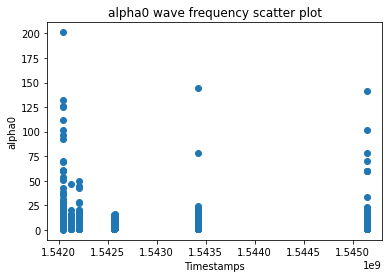

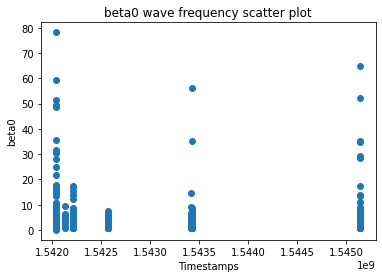

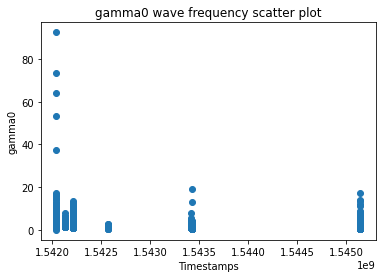

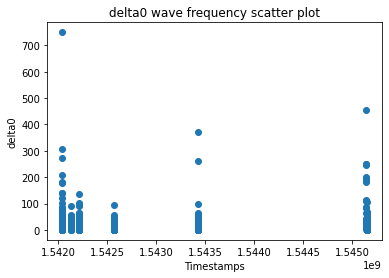

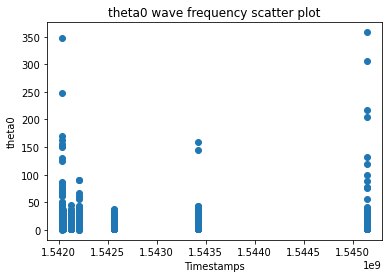

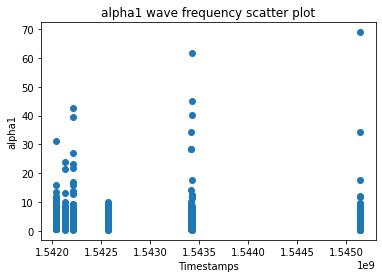

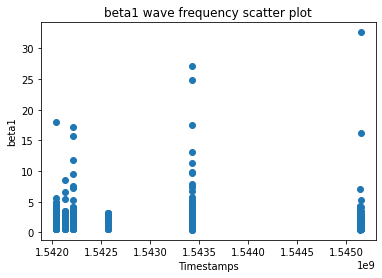

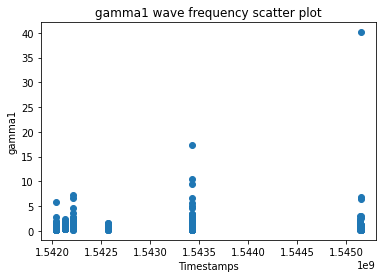

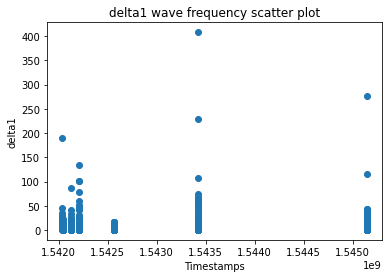

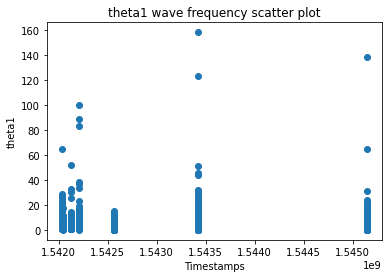

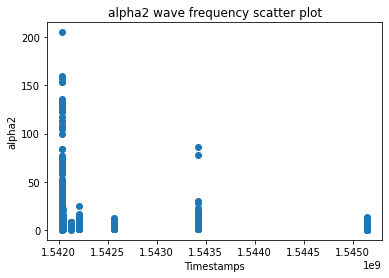

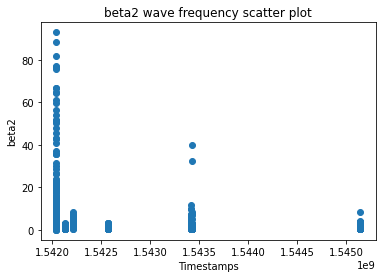

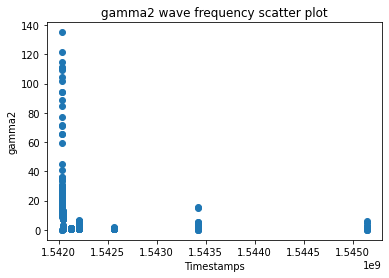

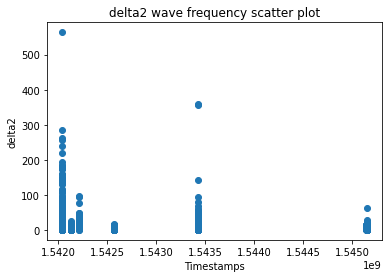

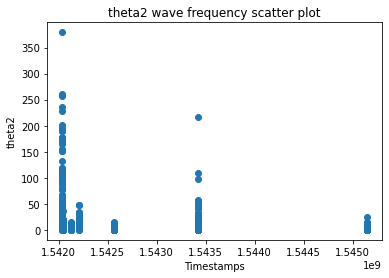

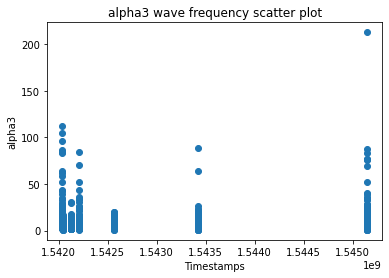

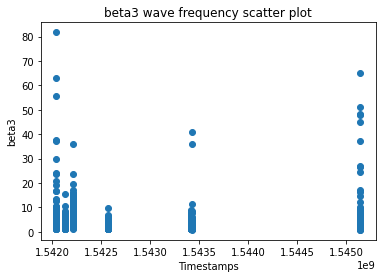

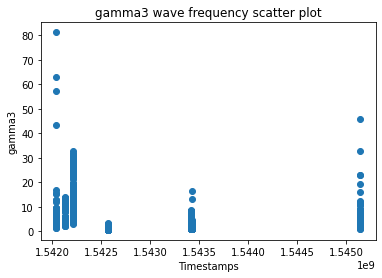

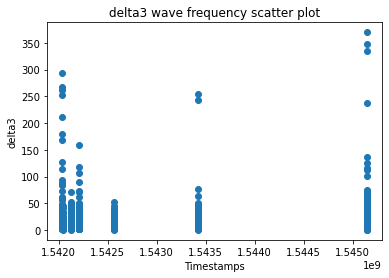

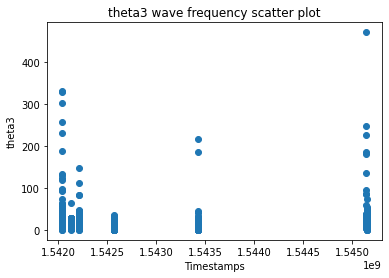

In [ ]:
for i in range(1,len(cols)-1):
  plt.title(cols[i]+" wave frequency scatter plot")
  plt.scatter(timestampCol,wavesCols.loc[:,cols[i]])
  plt.xlabel("Timestamps")
  plt.ylabel(cols[i])
  plt.show()

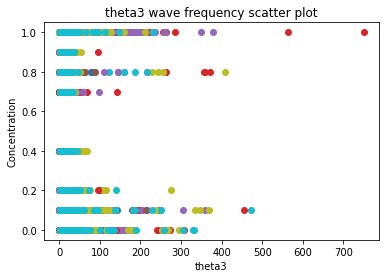

In [ ]:
for i in range(1,len(cols)-1):
  plt.title(cols[i]+" wave frequency scatter plot")
  plt.scatter(wavesCols.loc[:,cols[i]],concentration)
  plt.ylabel("Concentration")
  plt.xlabel(cols[i])
  #plt.show()

In [ ]:
glued_data.to_csv("GluedData")